In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

description= pd.read_csv('games_description.csv')
ranking= pd.read_csv('games_ranking.csv')
reviews= pd.read_csv('steam_game_reviews.csv', low_memory= False)

In [54]:
description= description.drop(['short_description'], axis= 1)
description= description.drop(['long_description'], axis= 1)

In [72]:
import numpy as np
#Changing player to number for aggregatting purposes
description.overall_player_rating= description.overall_player_rating.replace({'Overwhelmingly Positive': 1, 'Very Positive': 2, 'Mostly Positive': 3, 'Positive': 4, 'Mixed': 5, 'Mostly Negative': 6, 'Very Negative': 7, '7 user reviews': np.nan, '1 user reviews': np.nan, '6 user reviews': np.nan, '4 user reviews': np.nan})
description.rename(columns= {'minimum_system_requirement': 'minimum', 'recommend_system_requirement': 'recommended', 'number_of_reviews_from_purchased_people': 'reviews', 'number_of_english_reviews': 'english_reviews'}, inplace=True)
description= description.drop(['link'], axis= 1)

In [73]:
description.to_csv('description_update.csv')

In [83]:
reviews= reviews.drop(['review', 'funny', 'username'], axis= 1)

In [85]:
reviews.to_csv('updated_reviews.csv')

In [108]:
#Broke up the ranking data frame into it's seperate ranking statistics
ranking_sales= ranking[ranking.rank_type == 'Sales']
ranking_revenue= ranking[ranking.rank_type == 'Revenue']
ranking_review= ranking[ranking.rank_type == 'Review']

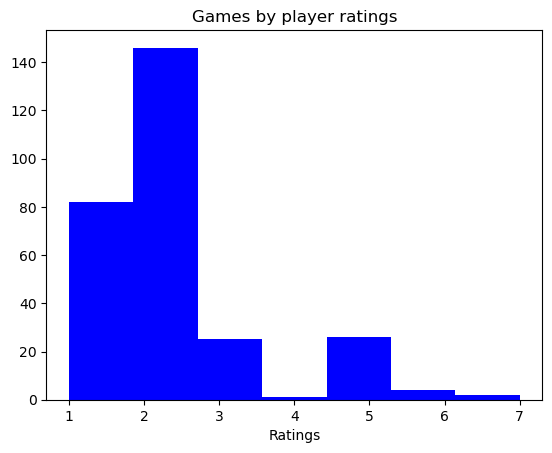

<Figure size 640x480 with 0 Axes>

In [102]:
plt.hist(description.overall_player_rating, label= 'Player Rating', color= 'blue', bins= 7)
plt.title('Games by player ratings')
plt.xlabel('Ratings')
plt.show()
plt.clf()